# Análise de dados geoespacial: distribuição de votos no exterior nas eleições presidenciais da Rússia de 2024

A análise de dados geoespacial é uma abordagem para aplicar análise estatística e outras técnicas analíticas a dados que possuem um aspecto geográfico ou espacial.

O objetivo deste projeto é visualizar os votos no exterior da Rússia na eleição presidencial de 2024. Para a visualização dos dados no mapa mundial, utilizamos o pacote GeoPandas. Trata-se de um projeto de código aberto desenvolvido para facilitar o trabalho com dados geoespaciais em Python. GeoPandas estende os tipos de dados utilizados pelo Pandas para permitir operações espaciais em tipos geométricos.

Os formatos mais populares para criar e compartilhar conjuntos de dados espaciais são o GeoJSON e o Shapefile. Neste projeto, optamos pelo uso do GeoJSON, que é um formato padrão aberto projetado para representar recursos geográficos simples, juntamente com seus atributos não espaciais. Ele é baseado em JSON.

Os dados de votação no exterior da Rússia foram obtidos do site oficial da Comissão Eleitoral Central http://cikrf.ru/ (é necessário utilizar uma VPN para acessar o site fora do Brasil).

Neste projeto, iremos realizar as seguintes etapas:

1. Tradução dos dados do russo para o português.
2. Limpeza dos dados.
3. Visualização dos dados.
4. Conclusão.

Os dados traduzidos estão disponíveis em https://bit.ly/3xAIyeQ

In [1]:
# Pacotes de processamento de dados
import pandas as pd
import re
pd.set_option('display.max_columns', None) # Permite ver todas as colunas, evitando que o Jupyter as esconde

# Pacote de tradução
from googletrans import Translator

# Pacotes de visualização de dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

In [3]:
# Abrimos os dados

df = pd.read_csv('Votes abroad.csv')
df.head(10)

,№,УИК,Страна,Город,"Число избирателей, включенных в список избирателей","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно","Число избирательных бюллетеней, выданных в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования",Число погашенных избирательных бюллетеней,Число избирательных бюллетеней в переносных ящиках для голосования,Число бюллетеней в стационарных ящиках для голосования,Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Даванков Владислав Андреевич,Даванков Владислав Андреевич (%),Путин Владимир Владимирович,Путин Владимир Владимирович (%),Слуцкий Леонид Эдуардович,Слуцкий Леонид Эдуардович (%),Харитонов Николай Михайлович,Харитонов Николай Михайлович (%)
0,1,8000,Абхазия,Сухум,2781,5000,73,2708,0,2219,73,2706,83,2696,0,0,34,"1,22",2620,"94,28",18,"0,65",24,"0,86"
1,2,8001,Абхазия,Сухум,3189,4900,0,3189,0,1711,0,3189,47,3142,0,0,30,"0,94",3068,"96,21",12,"0,38",32,1
2,3,8002,Абхазия,Сухум,3037,5200,646,2381,10,2163,656,2381,81,2956,0,0,39,"1,28",2873,"94,6",27,"0,89",17,"0,56"
3,4,8003,Абхазия,Сухум,1626,4900,0,1626,0,3274,0,1626,34,1592,0,0,19,"1,17",1554,"95,57",8,"0,49",11,"0,68"
4,5,8004,Абхазия,п. Цандрыпш,1915,4000,92,1823,0,2085,92,1823,58,1857,0,0,22,"1,15",1787,"93,32",18,"0,94",30,"1,57"
5,6,8005,Абхазия,Гагра,1689,4000,344,1340,5,2311,349,1340,42,1647,0,0,40,"2,37",1554,"92,01",22,"1,3",31,"1,84"
6,7,8006,Абхазия,Пицунда,1671,3000,0,1663,8,1329,8,1663,52,1619,0,0,35,"2,09",1537,"91,98",15,"0,9",32,"1,92"
7,8,8007,Абхазия,пос. Бзыпта,983,3000,0,983,0,2017,0,981,33,948,0,0,13,"1,33",930,"94,8",1,"0,1",4,"0,41"
8,9,8008,Абхазия,пос. Бамбора,2562,4000,1590,972,0,1438,1590,972,60,2502,0,0,51,"1,99",2353,"91,84",66,"2,58",32,"1,25"
9,10,8009,Австралия,Канберра,624,1100,478,146,0,476,478,146,80,544,0,0,157,"25,16",355,"56,89",11,"1,76",21,"3,37"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 24 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   №                                                                                          280 non-null    int64 
 1   УИК                                                                                        280 non-null    int64 
 2   Страна                                                                                     280 non-null    object
 3   Город                                                                                      280 non-null    object
 4   Число избирателей, включенных в список избирателей                                         280 non-null    int64 
 5   Число избирательных бюллетеней, полученных участковой изб

A maioria dos dados consiste em números, portanto, precisaremos traduzir os nomes das colunas e os locais (país e cidade).

In [4]:
df.shape

(280, 24)

O conjunto de dados possui 280 linhas e 24 colunas. É importante observar que em um país podem existir várias cidades com locais de votação, dependendo do tamanho do país.

## Tradução dos dados do russo para o português

Para a tradução automática dos dados, estamos utilizando a `Googletrans`, uma biblioteca de Python que implementa a API do Google Translate. Optei por traduzir os nomes das colunas manualmente, pois o Google Tradutor pode apresentar algumas imprecisões.

In [6]:
# Traduzimos os nomes das colunas 
df = df.set_axis(['id', 'Seção eleitoral', 'País', 'Cidade',
       'Número de eleitores incluídos na lista de eleitores',
       'Número de cédulas recebidas pela comissão de seção eleitoral',
       'Número de cédulas emitidas aos eleitores que votaram antecipadamente',
       'Número de cédulas emitidas aos eleitores dentro da seção no dia da votação',
       'Número de cédulas emitidas aos eleitores fora da seção no dia da votação',
       'Número de cédulas canceladas',
       'Número de cédulas em urnas portáteis',
       'Número de cédulas em urnas fixas',
       'Número de cédulas inválidas',
       'Número de cédulas válidas',
       'Número de cédulas perdidas',
       'Número de cédulas não contabilizadas no recebimento',
       'Davankov Vladislav Andreevich', 'Davankov Vladislav Andreevich (%)',
       'Putin Vladimir Vladimirovich', 'Putin Vladimir Vladimirovich (%)',
       'Slutsky Leonid Eduardovich', 'Slutsky Leonid Eduardovich (%)',
       'Kharitonov Nikolai Mikhailovich', 'Kharitonov Nikolai Mikhailovich (%)'], axis=1)

In [7]:
# Verificamos
df.head(10)

,id,Seção eleitoral,País,Cidade,Número de eleitores incluídos na lista de eleitores,Número de cédulas recebidas pela comissão de seção eleitoral,Número de cédulas emitidas aos eleitores que votaram antecipadamente,Número de cédulas emitidas aos eleitores dentro da seção no dia da votação,Número de cédulas emitidas aos eleitores fora da seção no dia da votação,Número de cédulas canceladas,Número de cédulas em urnas portáteis,Número de cédulas em urnas fixas,Número de cédulas inválidas,Número de cédulas válidas,Número de cédulas perdidas,Número de cédulas não contabilizadas no recebimento,Davankov Vladislav Andreevich,Davankov Vladislav Andreevich (%),Putin Vladimir Vladimirovich,Putin Vladimir Vladimirovich (%),Slutsky Leonid Eduardovich,Slutsky Leonid Eduardovich (%),Kharitonov Nikolai Mikhailovich,Kharitonov Nikolai Mikhailovich (%)
0,1,8000,Абхазия,Сухум,2781,5000,73,2708,0,2219,73,2706,83,2696,0,0,34,"1,22",2620,"94,28",18,"0,65",24,"0,86"
1,2,8001,Абхазия,Сухум,3189,4900,0,3189,0,1711,0,3189,47,3142,0,0,30,"0,94",3068,"96,21",12,"0,38",32,1
2,3,8002,Абхазия,Сухум,3037,5200,646,2381,10,2163,656,2381,81,2956,0,0,39,"1,28",2873,"94,6",27,"0,89",17,"0,56"
3,4,8003,Абхазия,Сухум,1626,4900,0,1626,0,3274,0,1626,34,1592,0,0,19,"1,17",1554,"95,57",8,"0,49",11,"0,68"
4,5,8004,Абхазия,п. Цандрыпш,1915,4000,92,1823,0,2085,92,1823,58,1857,0,0,22,"1,15",1787,"93,32",18,"0,94",30,"1,57"
5,6,8005,Абхазия,Гагра,1689,4000,344,1340,5,2311,349,1340,42,1647,0,0,40,"2,37",1554,"92,01",22,"1,3",31,"1,84"
6,7,8006,Абхазия,Пицунда,1671,3000,0,1663,8,1329,8,1663,52,1619,0,0,35,"2,09",1537,"91,98",15,"0,9",32,"1,92"
7,8,8007,Абхазия,пос. Бзыпта,983,3000,0,983,0,2017,0,981,33,948,0,0,13,"1,33",930,"94,8",1,"0,1",4,"0,41"
8,9,8008,Абхазия,пос. Бамбора,2562,4000,1590,972,0,1438,1590,972,60,2502,0,0,51,"1,99",2353,"91,84",66,"2,58",32,"1,25"
9,10,8009,Австралия,Канберра,624,1100,478,146,0,476,478,146,80,544,0,0,157,"25,16",355,"56,89",11,"1,76",21,"3,37"


Como iremos combinar os dados de votação com o arquivo `GeoJSON` contendo os nomes dos países em inglês, precisaremos traduzir os nomes dos países e das cidades para o inglês também. Para isso, vamos começar escrevendo uma função auxiliar para utilizar o módulo `Translator`.

In [8]:
# Função para traduzir de russo para inglês

def translate_text(text):
    translator = Translator()
    translated_text = translator.translate(text, src='ru', dest='en').text
    return translated_text

In [9]:
# Aplicamos a função
df['País'] = df['País'].apply(translate_text)

In [10]:
df['Cidade'] = df['Cidade'].apply(translate_text)

In [11]:
# Verificamos
df.head(10)

,id,Seção eleitoral,País,Cidade,Número de eleitores incluídos na lista de eleitores,Número de cédulas recebidas pela comissão de seção eleitoral,Número de cédulas emitidas aos eleitores que votaram antecipadamente,Número de cédulas emitidas aos eleitores dentro da seção no dia da votação,Número de cédulas emitidas aos eleitores fora da seção no dia da votação,Número de cédulas canceladas,Número de cédulas em urnas portáteis,Número de cédulas em urnas fixas,Número de cédulas inválidas,Número de cédulas válidas,Número de cédulas perdidas,Número de cédulas não contabilizadas no recebimento,Davankov Vladislav Andreevich,Davankov Vladislav Andreevich (%),Putin Vladimir Vladimirovich,Putin Vladimir Vladimirovich (%),Slutsky Leonid Eduardovich,Slutsky Leonid Eduardovich (%),Kharitonov Nikolai Mikhailovich,Kharitonov Nikolai Mikhailovich (%)
0,1,8000,Abkhazia,Sukhum,2781,5000,73,2708,0,2219,73,2706,83,2696,0,0,34,"1,22",2620,"94,28",18,"0,65",24,"0,86"
1,2,8001,Abkhazia,Sukhum,3189,4900,0,3189,0,1711,0,3189,47,3142,0,0,30,"0,94",3068,"96,21",12,"0,38",32,1
2,3,8002,Abkhazia,Sukhum,3037,5200,646,2381,10,2163,656,2381,81,2956,0,0,39,"1,28",2873,"94,6",27,"0,89",17,"0,56"
3,4,8003,Abkhazia,Sukhum,1626,4900,0,1626,0,3274,0,1626,34,1592,0,0,19,"1,17",1554,"95,57",8,"0,49",11,"0,68"
4,5,8004,Abkhazia,p. Zandrypsh,1915,4000,92,1823,0,2085,92,1823,58,1857,0,0,22,"1,15",1787,"93,32",18,"0,94",30,"1,57"
5,6,8005,Abkhazia,Gagra,1689,4000,344,1340,5,2311,349,1340,42,1647,0,0,40,"2,37",1554,"92,01",22,"1,3",31,"1,84"
6,7,8006,Abkhazia,Pitsunda,1671,3000,0,1663,8,1329,8,1663,52,1619,0,0,35,"2,09",1537,"91,98",15,"0,9",32,"1,92"
7,8,8007,Abkhazia,pos.Bzypta,983,3000,0,983,0,2017,0,981,33,948,0,0,13,"1,33",930,"94,8",1,"0,1",4,"0,41"
8,9,8008,Abkhazia,pos.Bambora,2562,4000,1590,972,0,1438,1590,972,60,2502,0,0,51,"1,99",2353,"91,84",66,"2,58",32,"1,25"
9,10,8009,Australia,Canberra,624,1100,478,146,0,476,478,146,80,544,0,0,157,"25,16",355,"56,89",11,"1,76",21,"3,37"


In [12]:
# Verificamos se há valores nulos
df.isna().sum()

id                                                                            0
Seção eleitoral                                                               0
País                                                                          0
Cidade                                                                        0
Número de eleitores incluídos na lista de eleitores                           0
Número de cédulas recebidas pela comissão de seção eleitoral                  0
Número de cédulas emitidas aos eleitores que votaram antecipadamente          0
Número de cédulas emitidas aos eleitores dentro da seção no dia da votação    0
Número de cédulas emitidas aos eleitores fora da seção no dia da votação      0
Número de cédulas canceladas                                                  0
Número de cédulas em urnas portáteis                                          0
Número de cédulas em urnas fixas                                              0
Número de cédulas inválidas             

Deu tudo certo! Vale lembrar que a biblioteca `googletrans` tem limite máximo de 15 mil caracteres em um único texto.

## Limpeza de dados

Analisndo o conjunto de dados, pode parecer que os dados estão prontos para serem visualizados ou utilizados em análises. Mas não se engana, pois ainda há uma quantidade considerável de limpeza a ser realizada. Um dos desafios que temos é a ausência de consulados ou embaixadas da Rússia em alguns países, o que resulta na falta de locais de votação. Nesses casos, os eleitores precisam se deslocar para países vizinhos onde há consulado e local de votação disponíveis. Por exemplo, os eleitores russos que residem no Suriname são obrigados a votar no Brasil. Como resultado, os votos registrados no Brasil incluem também os votos do Suriname. Vamos investigar e corrigir esses casos para garantir a integridade dos dados.

In [3]:
df[df['País'].str.contains('Brazil', case=False)]

,id,Seção eleitoral,País,Cidade,Número de eleitores incluídos na lista de eleitores,Número de cédulas recebidas pela comissão de seção eleitoral,Número de cédulas emitidas aos eleitores que votaram antecipadamente,Número de cédulas emitidas aos eleitores dentro da seção no dia da votação,Número de cédulas emitidas aos eleitores fora da seção no dia da votação,Número de cédulas canceladas,Número de cédulas em urnas portáteis,Número de cédulas em urnas fixas,Número de cédulas inválidas,Número de cédulas válidas,Número de cédulas perdidas,Número de cédulas não contabilizadas no recebimento,Davankov Vladislav Andreevich,Davankov Vladislav Andreevich (%),Putin Vladimir Vladimirovich,Putin Vladimir Vladimirovich (%),Slutsky Leonid Eduardovich,Slutsky Leonid Eduardovich (%),Kharitonov Nikolai Mikhailovich,Kharitonov Nikolai Mikhailovich (%)
43,44,8056,Brazil and Surinam,Brazilia,156,400,0,156,0,244,0,156,9,147,0,0,26,"16,67",110,"70,51",3,"1,92",8,"5,13"
44,45,8057,Brazil and Surinam,Rio de Janeiro,133,500,0,133,0,367,0,133,14,119,0,0,43,"32,33",61,"45,86",7,"5,26",8,"6,02"
45,46,8058,Brazil and Surinam,San Paulo,193,500,0,191,0,309,0,191,28,163,0,0,61,"31,94",96,"50,26",3,"1,57",3,"1,57"


Podemos ver, que realmente os votos no Brasil e Suriname estão contados juntos. Isso vai atrapalhar a visualização de votos no mapa. Vamos criair um conjunto de todos os locais de votação nesta situação. 

In [4]:
# Criamos uma set com os nomes dos países que contêm 'and'
paises_and = {pais for pais in df['País'] if re.search(r'\s+and', pais, flags=re.IGNORECASE)}

paises_and

{'Angola and San Tome and Principia',
 'Benin and that',
 'Bosnia and Herzegovina',
 'Brazil and Surinam',
 'Cameroon and equatorial Guinea',
 'Cat-d’Ivoire and',
 'Djibuti and Somalia',
 'Gana and Liberia',
 'Guinea and Sierra Leone',
 'Indonesia and East Timer',
 'Madagascar and Comor islands',
 'Mali and Niger',
 'Mexico and Belize',
 'Mozambique and Esvatini',
 'New Zealand, Tonga and Samoa',
 'Nicaragua, Honduras and Salvador',
 'Senegal and Gambia',
 'South African Republic and Lesoto',
 'Sri Lanka and the Maldives',
 'The Philippines and Palau',
 'Uganda and South Sudan',
 'Venezuela, Dominican Republic and Haiti',
 'Zimbabwe and Malawi'}

Precisamos tomar cuidado pois 'Bosnia and Herzegovina' é um país só, mesmo tendo 'and' no meio. 

Vamos deixar os países com maior área geográfica e população. Criamos uma lista com países para renomear.

In [5]:
# Lista com nomes dos países para renomear
lista_pais_and = {
    'Cat-d’Ivoire and': 'Cat-d’Ivoire',
    'Philippines and Palau': 'Philippines',
    'Guinea and Sierra Leone': 'Guinea',
    'Gana and Liberia': 'Ghana',
    'Mali and Niger': 'Mali',
    'Uganda and South Sudan': 'Uganda',
    'Brazil and Surinam': 'Brazil',
    'Angola and San Tome and Principia': 'Angola',
    'Mexico and Belize': 'Mexico',
    'Madagascar and Comor islands': 'Madagascar',
    'Mozambique and Esvatini': 'Mozambique',
    'Zimbabwe and Malawi': 'Zimbabwe',
    'Benin and that': 'Benin',
    'Djibuti and Somalia': 'Somalia',
    'Nicaragua, Honduras and Salvador': 'Nicaragua',
    'Sri Lanka and the Maldives': 'Sri Lanka',
    'South African Republic and Lesoto': 'South African Republic',
    'Venezuela, Dominican Republic and Haiti': 'Venezuela',
    'New Zealand, Tonga and Samoa': 'New Zealand',
    'Indonesia and East Timer': 'Indonesia',
    'Cameroon and equatorial Guinea': 'Cameroon',
    'Senegal and Gambia': 'Senegal'
}

In [6]:
# Renomear os países de acordo com a lista
df['País'].replace(lista_pais_and, inplace=True)

In [8]:
# Verificamos
df[df['País'].str.contains('Brazil')]

,id,Seção eleitoral,País,Cidade,Número de eleitores incluídos na lista de eleitores,Número de cédulas recebidas pela comissão de seção eleitoral,Número de cédulas emitidas aos eleitores que votaram antecipadamente,Número de cédulas emitidas aos eleitores dentro da seção no dia da votação,Número de cédulas emitidas aos eleitores fora da seção no dia da votação,Número de cédulas canceladas,Número de cédulas em urnas portáteis,Número de cédulas em urnas fixas,Número de cédulas inválidas,Número de cédulas válidas,Número de cédulas perdidas,Número de cédulas não contabilizadas no recebimento,Davankov Vladislav Andreevich,Davankov Vladislav Andreevich (%),Putin Vladimir Vladimirovich,Putin Vladimir Vladimirovich (%),Slutsky Leonid Eduardovich,Slutsky Leonid Eduardovich (%),Kharitonov Nikolai Mikhailovich,Kharitonov Nikolai Mikhailovich (%)
43,44,8056,Brazil,Brazilia,156,400,0,156,0,244,0,156,9,147,0,0,26,"16,67",110,"70,51",3,"1,92",8,"5,13"
44,45,8057,Brazil,Rio de Janeiro,133,500,0,133,0,367,0,133,14,119,0,0,43,"32,33",61,"45,86",7,"5,26",8,"6,02"
45,46,8058,Brazil,San Paulo,193,500,0,191,0,309,0,191,28,163,0,0,61,"31,94",96,"50,26",3,"1,57",3,"1,57"


Diferente dos sobrenomes brasileiros que são formados por nome próprio + sobrenome materno + sobrenome paterno, os sobrenomes russos da atualidade seguem a seguinte estrutura: nome próprio + patronímico + nome de família. (Por isso, quando recebi a cidadania brasileira precisei abondonar meu nome patronímico).

Momento de cultura: O nome patronímico, normalmente, é formado com os sufixos -ovitch, -evitch ou -itch para os homens e -ievna, -ovna ou -itchna para as mulheres.

Por exemplo, se um determinado Piôtr tiver uma filha Ekaterina e um filho Ivan, eles se chamarão Ekaterina Petróvna (acrescido de sobrenome) e Ivan Petróvitch (acrescido de sobrenome). No meu caso, sou Olesya, filha do meu pai Igor, então sou Olesya Igorevna! Alias, é a maneira mais educada de tratamento e, se você quiser demonstrar respeito durante uma conversa formal, deve buscar aplicá-la.

Agora sabendo o que significa as tres palavras em nomes dos candidatos, vamos deixar só os sobrenomes para não poluir a visualização.

In [10]:
df.rename(columns={'Davankov Vladislav Andreevich': 'Davankov',
                   'Putin Vladimir Vladimirovich': 'Putin',
                   'Slutsky Leonid Eduardovich': 'Slutsky',
                   'Kharitonov Nikolai Mikhailovich': 'Kharitonov'}, inplace=True)

In [11]:
# Verificamos
df.head()

,id,Seção eleitoral,País,Cidade,Número de eleitores incluídos na lista de eleitores,Número de cédulas recebidas pela comissão de seção eleitoral,Número de cédulas emitidas aos eleitores que votaram antecipadamente,Número de cédulas emitidas aos eleitores dentro da seção no dia da votação,Número de cédulas emitidas aos eleitores fora da seção no dia da votação,Número de cédulas canceladas,Número de cédulas em urnas portáteis,Número de cédulas em urnas fixas,Número de cédulas inválidas,Número de cédulas válidas,Número de cédulas perdidas,Número de cédulas não contabilizadas no recebimento,Davankov,Davankov Vladislav Andreevich (%),Putin,Putin Vladimir Vladimirovich (%),Slutsky,Slutsky Leonid Eduardovich (%),Kharitonov,Kharitonov Nikolai Mikhailovich (%)
0,1,8000,Abkhazia,Sukhum,2781,5000,73,2708,0,2219,73,2706,83,2696,0,0,34,"1,22",2620,"94,28",18,"0,65",24,"0,86"
1,2,8001,Abkhazia,Sukhum,3189,4900,0,3189,0,1711,0,3189,47,3142,0,0,30,"0,94",3068,"96,21",12,"0,38",32,1
2,3,8002,Abkhazia,Sukhum,3037,5200,646,2381,10,2163,656,2381,81,2956,0,0,39,"1,28",2873,"94,6",27,"0,89",17,"0,56"
3,4,8003,Abkhazia,Sukhum,1626,4900,0,1626,0,3274,0,1626,34,1592,0,0,19,"1,17",1554,"95,57",8,"0,49",11,"0,68"
4,5,8004,Abkhazia,p. Zandrypsh,1915,4000,92,1823,0,2085,92,1823,58,1857,0,0,22,"1,15",1787,"93,32",18,"0,94",30,"1,57"


###  Determinar o candidato vencedor em cada país

Seria útil para análises futuras criar uma coluna `Vencedor` contendo o nome do vencedor em cada país.

In [12]:
# Lista de todas as colunas de candidatos
candidatos = ['Davankov', 'Putin', 'Slutsky', 'Kharitonov']

# Calculamos os votos por país somando os votos de todas as seções eleitorais
votos_por_pais = df.groupby('País')[candidatos].sum()

# Escolhemos o vencedor para cada país
vencedores_por_pais = votos_por_pais.idxmax(axis=1)

# Criamos a coluna 'Vencedor'
df['Vencedor'] = df['País'].map(vencedores_por_pais)

Um país no dataframe pode ter várias localidades com seções eleitorais, resultando na presença repetida do mesmo país nos dados. Isso pode dificultar a visualização dos votos no mapa. Portanto, vamos manipular os dados de forma a ter apenas uma linha para cada país e remover as colunas que não são relevantes para nossa análise.

In [17]:
# Removemos repitiçoes e salvamos em outro df
df_clean = df[['País', 'Davankov', 'Putin', 
       'Slutsky', 'Kharitonov', 'Vencedor']].drop_duplicates(subset='País').reset_index(drop=True)

In [18]:
df_clean.head()

,País,Davankov,Putin,Slutsky,Kharitonov,Vencedor
0,Abkhazia,34,2620,18,24,Putin
1,Australia,157,355,11,21,Putin
2,Austria,991,774,28,64,Davankov
3,Azerbaijan,451,2449,73,63,Putin
4,Egypt,215,962,32,32,Putin


## Visualização de dados

Iniciamos a visualização dos dados com um gráfico de pizza, também conhecido como pie chart, para mostrar a distribuição de votos por candidato.

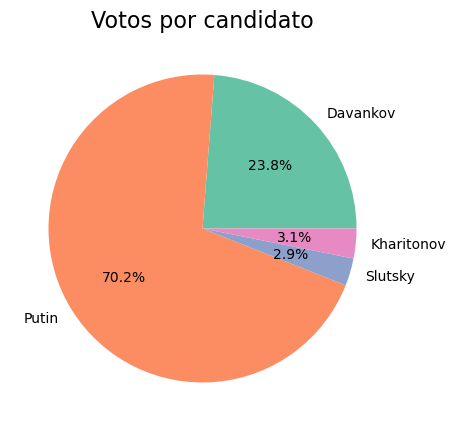

In [51]:
# Construimos o gráfico de pizza 

total_votos = df_clean[['Davankov', 'Putin', 'Slutsky', 'Kharitonov']].sum()

plt.figure(figsize=(5, 5))
plt.pie(total_votos, labels=total_votos.index, colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title(label='Votos por candidato', fontdict={"fontsize":16})
plt.show()

Como esperado, não encontramos surpresas aqui.

### Votos no mapa de mundo

Chegamos à etapa de visualização dos votos no mapa do mundo. Para isso, começamos utilizando um arquivo no formato GeoJSON que representa o mapa do mundo.

In [21]:
# Carregar o shapefile do mundo

path = 'Longitude_Graticules_and_World_Countries_Boundaries.geojson'
mapa_mundo = gpd.read_file(path)
mapa_mundo.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


O arquivo contém os nomes dos países juntamente com suas coordenadas, representados como polígonos ou multipolígonos. E o melhor de tudo, podemos visualizar o mapa!

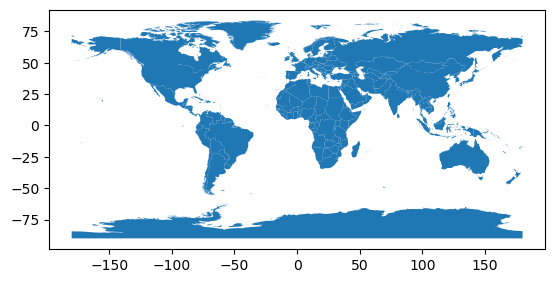

In [22]:
mapa_mundo.plot()
plt.show()

Vamos verificar as diferenças em nomes de países do nosso conjunto de dados e do mapa.

In [24]:
# Obter conjuntos de países únicos de cada DataFrame
paises_df = set(df_clean['País'])
paises_mapa_mundo = set(mapa_mundo['CNTRY_NAME'])

# Verificar sobreposição e diferenças
paises_presentes_em_df_e_mapa = paises_df.intersection(paises_mapa_mundo)
paises_ausentes_em_df = paises_mapa_mundo - paises_df
paises_ausentes_em_mapa = paises_df - paises_mapa_mundo

# Imprimir resultados
print("Países presentes em ambos os DataFrames:")
print(paises_presentes_em_df_e_mapa)
print("\nPaíses ausentes no 'df_clean' (presentes no mapa_mundo):")
print(paises_ausentes_em_df)
print("\nPaíses ausentes no 'mapa_mundo' (presentes no df_clean):")
print(paises_ausentes_em_mapa)

Países presentes em ambos os DataFrames:
{'Guinea', 'Jordan', 'Nigeria', 'India', 'Greece', 'Israel', 'Mongolia', 'Uzbekistan', 'Guatemala', 'Qatar', 'Iceland', 'Malta', 'Mali', 'Lithuania', 'Seychelles', 'United Arab Emirates', 'Sweden', 'Costa Rica', 'Tunisia', 'Saudi Arabia', 'Turkmenistan', 'Chile', 'Algeria', 'Iraq', 'France', 'Thailand', 'Jamaica', 'Afghanistan', 'Cyprus', 'Mauritania', 'Germany', 'Namibia', 'Benin', 'Italy', 'Serbia', 'Cape Verde', 'Belgium', 'Slovenia', 'Argentina', 'Latvia', 'Armenia', 'Colombia', 'Brunei', 'Madagascar', 'Chad', 'Bulgaria', 'Botswana', 'Zambia', 'Netherlands', 'Singapore', 'Cameroon', 'Kenya', 'Denmark', 'Libya', 'Ireland', 'Finland', 'Luxembourg', 'Canada', 'Kazakhstan', 'Guyana', 'Albania', 'Gabon', 'Zimbabwe', 'Estonia', 'Kuwait', 'Japan', 'Malaysia', 'Romania', 'Slovakia', 'Lebanon', 'Kyrgyzstan', 'Eritrea', 'Nepal', 'Peru', 'Bangladesh', 'Panama', 'Syria', 'Morocco', 'Oman', 'Uruguay', 'Sri Lanka', 'Mozambique', 'Uganda', 'Mauritius', 'No

A maioria dos países na lista `Países ausentes no 'df_clean' (presentes no mapa_mundo)` são países onde não há consulado russo e local de votação. Mostramos esses países em uma cor diferente no mapa-múndi.

Além disso, observamos que alguns países têm nomes escritos de forma diferente. Para garantir a consistência dos dados em nosso dataframe, vamos criar uma lista com as discrepâncias encontradas e padronizar os nomes correspondentes.

In [25]:
# Discrepâncias nos nomes dos países
discrepancias = {
    'Türkiye': 'Turkey',
    'Guinea-Bisau': 'Guinea-Bissau',
    'Palestine': 'Gaza Strip',
    'Republic of Congo': 'Congo',
    'DPRK': 'North Korea',
    'Northern Macedonia': 'Macedonia',
    'Czech': 'Czech Republic',
    'Cat-d’Ivoire': 'Ivory Coast',
    'PRC': 'China',
    'The Republic of Korea': 'South Korea',
    'South African Republic':'South Africa',
    'Democratic Republic of Congo': 'Zaire',
    'Tanzania': 'Tanzania, United Republic of',
    'Central African Republic (TsAB)': 'Central African Republic',
    'USA': 'United States',
    'Abkhazia': 'Georgia',
    'Myanmar': 'Myanmar (Burma)',
    'The Philippines and Palau': 'Philippines',   
    'Belarus': 'Byelarus',
    'Great Britain': 'United Kingdom'  
}

In [26]:
# Renomear os países no df_clean de acordo com a lista

df_clean['País'].replace(discrepancias, inplace=True)

In [27]:
# Salvamos os dados 
df.to_csv('Votes_abroad_clean.csv', index=False)

In [28]:
# Verificamos
paises_ausentes_em_mapa = set(df_clean['País']) - set(mapa_mundo['CNTRY_NAME'])
print("\nPaíses ausentes no 'mapa_mundo' (presentes no df_clean):")
print(paises_ausentes_em_mapa)


Países ausentes no 'mapa_mundo' (presentes no df_clean):
{'South Ossetia'}


A Ossétia do Sul é um estado autodeclarado no Sul do Cáucaso, não reconhecido pela maioria do mundo, conforme descrito pela Wikipedia. 

A eliminação das discrepâncias nos nomes dos países foi importante para o próximo passo: a junção de dois dataframes em um só.

In [29]:
# Realizando a junção dos df

df_final = pd.merge(mapa_mundo, df_clean, left_on='CNTRY_NAME', right_on='País', how='left')

In [30]:
df_final.head()

,OBJECTID,CNTRY_NAME,geometry,País,Davankov,Putin,Slutsky,Kharitonov,Vencedor
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,NaN,NaN,NaN,NaN,NaN
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",Afghanistan,4.0,120.0,1.0,5.0,Putin
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",Algeria,25.0,525.0,16.0,19.0,Putin
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...",Azerbaijan,451.0,2449.0,73.0,63.0,Putin


E agora podemos plotar o mapa mostrando o candidato vencedor em cada país.

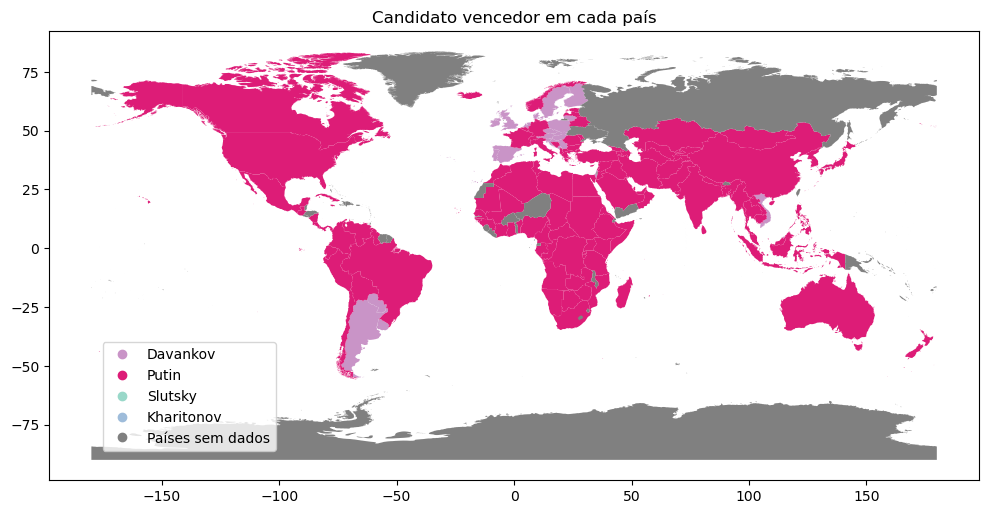

In [49]:
# Plotamos o mapa mostrando o candidato vencedor em cada país

# Definimos cores para cada candidato
cores = {'Davankov': '#c994c7', 'Putin': '#dd1c77', 'Slutsky': '#99d8c9', 'Kharitonov': '#9ebcda'}

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for candidato, cor in cores.items():
    data = df_final[df_final['Vencedor'] == candidato]
    if not data.empty:  # Verificar se há dados a serem plotados
        data.plot(color=cor, ax=ax)

# Adicionamos legendas 
handles = [plt.Line2D([0], [0], color=cor, marker='o', linestyle='', label=candidato) for candidato, cor in cores.items()]
ax.legend(handles=handles)

# Lista com países sem dados
paises_ausentes = list(set(mapa_mundo['CNTRY_NAME']) - set(df_clean['País']))
mapa_mundo[mapa_mundo['CNTRY_NAME'].isin(paises_ausentes)].plot(color='gray', ax=ax)

# Legenda para lista
handles.append(plt.Line2D([0], [0], color='gray', marker='o', linestyle='', label='Países sem dados'))

ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0.05, 0.05))   
ax.set_title('Candidato vencedor em cada país')
plt.savefig('Mapa de votos.png', bbox_inches='tight');
plt.show();

## Conclusão

Para gerar um mapa com a distribuição de votos, utilizamos a biblioteca de código aberto `GeoPandas`. Primeiramente, selecionamos um arquivo no formato `GeoJSON` que representa o mapa do mundo e, em seguida, o mesclamos com o conjunto de dados contendo os votos. É importante que os nomes dos países nos dois arquivos sejam idênticos.

No mapa, podemos observar que apenas duas cores de candidatos vencedores por país são destacadas: Putin e Davankov, sendo a vitória de Putin bastante prevalente. Na América do Sul, o candidato Davankov conquistou vitórias na Argentina, Uruguai e Paraguai. Entretanto, na Europa, os resultados parecem estar mais equilibrados entre Putin e Davankov.

Notamos também três grandes regiões sem dados de votação: Rússia, Groenlândia e Antártica. A Rússia é representada pela cor cinza, pois a análise atual considera os votos realizados fora do país. Quanto à Groenlândia, esta não possui uma embaixada russa, o que a impede de ser um local de votação. Os russos que residem lá costumam votar na Dinamarca. No entanto, surge a dúvida: como os pesquisadores na Antártica exercem seu direito ao voto?

## Bibliografia

1. Gesiel Rios Lopes, Karina Jorge Pelarigo, Alexandre C. B. Delbem, Joélcio Sousa `Análise Exploratória de Dados Espaciais com Python`, X Escola Regional de Computação Ceará, 2022.
2. Documentação oficial de Geopandas https://geopandas.org/en/stable/docs.html.